In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
from shapely.geometry import Polygon, Point
from shapely.ops import split, linemerge
from tqdm import tqdm
import rasterio
import pyproj
from rasterio.crs import CRS
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.ticker as mticker
import osmnx as ox
import glob
from sklearn.cluster import KMeans
from importlib import reload
import rivabar as rb

%matplotlib qt

In [40]:
reload(rb)

<module 'rivabar' from '/Users/zoltan/Dropbox/rivabar/rivabar/rivabar.py'>

## Branco River, Brazil - single Landsat TIF file

* link to data file: https://www.dropbox.com/s/aa7eq8ky0y1wryl/LC08_232060_20140219.tif?dl=0

In [41]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Branco/'
fname = 'LC08_232060_20140219.tif'
start_x = 675796.2
start_y = 98338.8
end_x = 628190.3
end_y = -91886.6

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
        rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
        file_type='single_tif', ch_belt_smooth_factor=1e8, ch_belt_half_width = 2000, 
        remove_smaller_components=True, delete_pixels_polys = False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)

rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:05<00:00,  1.45s/it]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 63/63 [00:00<00:00, 6185.57it/s]


creating linestrings for primal graph


65it [00:00, 97.74it/s] 


start and end nodes in G_primal:
42 1
getting bank coordinates for the two main banks


100%|████████████████████████████████████| 7160/7160 [00:00<00:00, 30185.74it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 63/63 [00:06<00:00, 10.15it/s]


setting half channel widths


100%|███████████████████████████████████████████| 65/65 [00:18<00:00,  3.54it/s]


creating directed graph


100%|████████████████████████████████████| 6744/6744 [00:00<00:00, 28931.18it/s]


### Plot width data for main channel

In [42]:
# plot width data for main channel
plt.figure()
plt.plot(s, (np.array(w1l)+np.array(w2l))*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot banks and centerline for main channel

In [57]:
plt.figure()
plt.plot(x, y)
plt.plot(x_utm1, y_utm1)
plt.plot(x_utm2, y_utm2)
plt.axis('equal');

### Save results to shapefiles

In [47]:
rb.write_shapefiles_and_graphs(G_rook, D_primal, dataset, dirname, 'Branco')

### Display an image band in UTM coordinates

The cell below is an example of how you can load the first band from a raster file and display it in UTM coordinate space (so that you can use 'ginput' to get start_x, start_y, end_x, end_y). Ideally this raster is already an mndwi file so that the channels are more obvious.

In [4]:
reload(rb)
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Branco/'
fname = 'LC08_232060_20140219.tif'
im, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y = rb.read_and_plot_im(dirname, fname)

## Mamore River, Bolivia - Landsat bands

* link to data folder: https://www.dropbox.com/scl/fo/k7lhzey6kv6kjux92or5d/h?rlkey=zx8g66sprd6038i5sw5xkixgi&dl=0

In [48]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Bolivia/Mamore/'
fname = 'LC08_L1TP_232071_20160616_20170324_01_T1'
start_x = 303810
start_y = -1851620
end_x = 285603
end_y = -1666131

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='multiple_tifs', ch_belt_smooth_factor=1e8, ch_belt_half_width=2000, 
                remove_smaller_components=False, delete_pixels_polys = False)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 12.77it/s]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 5807.68it/s]


creating linestrings for primal graph


12it [00:00, 104.91it/s]


start and end nodes in G_primal:
2 1
getting bank coordinates for the two main banks


100%|██████████████████████████████████| 13641/13641 [00:00<00:00, 39403.44it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 10.40it/s]


setting half channel widths


100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.58it/s]


creating directed graph


100%|██████████████████████████████████| 13447/13447 [00:00<00:00, 38972.20it/s]


### Plot width data for main channel

In [7]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [10]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=0.5*1e7, min_sinuosity=1.1, dx=30)
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,2341.471672,1.318817,295.765688,61.875644,0.941263
1,5104.628118,1.202831,261.667942,85.122023,3.418928
2,2596.847340,2.042607,162.393540,31.244930,9.221460
3,4311.836920,1.204874,202.713648,43.140583,12.870490
4,5412.782080,1.742643,220.911595,42.964761,17.900541


## Brahmaputra River, India / Bangladesh - Landsat bands

* link to data folder: https://www.dropbox.com/scl/fo/wqb8z30wgor3vwg19bdeq/h?rlkey=pq0vxqabhxwnf2rxs07sjk8o1&dl=0

In [49]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Brahmaputra_2/'
fname = 'LC08_L1TP_138042_20190114_20190131_01_T1'
start_x = 859250.5
start_y = 2903119.2
end_x = 767358.1
end_y = 2776067.9

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='multiple_tifs', ch_belt_smooth_factor=1e8, ch_belt_half_width=2000,
                remove_smaller_components=True, mndwi_threshold = 0.01)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

reading Landsat data


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 14.25it/s]


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 297/297 [00:00<00:00, 5447.31it/s]


creating linestrings for primal graph


299it [00:13, 21.97it/s]


start and end nodes in G_primal:
2 1
getting bank coordinates for the two main banks


100%|████████████████████████████████████| 6698/6698 [00:00<00:00, 27863.52it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 297/297 [00:30<00:00,  9.60it/s]


setting half channel widths


100%|█████████████████████████████████████████| 299/299 [01:32<00:00,  3.24it/s]


creating directed graph


100%|████████████████████████████████████████| 875/875 [00:06<00:00, 137.85it/s]


there is more than one sink in D_primal!
these sinks are: [1, 547]
there are 5cycles in D_primal!
these cycles are: [[166, 170, 173, 169, 442, 443], [169, 442, 443, 170, 173], [169, 442, 173], [65, 322, 68, 67], [322, 68, 67]]


100%|████████████████████████████████████| 6609/6609 [00:00<00:00, 22179.19it/s]


### Exceedance probability plot of island areas

In [51]:
island_areas = []
channel_areas = []
total_areas = []
degrees = []
lengths = []
for node in G_rook:
    poly1 = G_rook.nodes()[node]['bank_polygon']
    poly2 = G_rook.nodes()[node]['cl_polygon']
    if poly1.area > 0 and poly2.area > poly1.area:
        island_areas.append(poly1.area)
        channel_areas.append(poly2.area - poly1.area)
        total_areas.append(poly2.area)
        degrees.append(G_rook.degree(node))
        lengths.append(poly1.length)
        
island_areas_sorted = np.sort(island_areas)
island_areas_sorted = island_areas_sorted[:-2]
exceedance = 1.-np.arange(1.,len(island_areas_sorted) + 1.)/len(island_areas_sorted)

plt.figure()
plt.loglog(island_areas_sorted, exceedance);

### Histogram of node degree distribution

In [17]:
plt.figure()
n, bins, patches = plt.hist(degrees, bins=np.arange(1.5, 25.6, 1))

plt.bar(np.arange(2,26), n)
plt.xticks(np.arange(2,26))
plt.xlabel('node degree')
plt.ylabel('count')
plt.title('number of neighbors in island neighborhood graph');

## Purus River, MNDWI image generated in Google Earth Engine

* output from GEE needs to be converted to UTM coordinates before running rivabar
* link to data file: https://www.dropbox.com/scl/fi/7bpz3b4eikzdu59cv4bqu/L8_mndwi_Purus_2017_UTM.tif?rlkey=dkv5ykf1xca0jh478yhn6a6im&dl=0

In [53]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname = "L8_mndwi_Purus_2017_UTM.tif"
start_x = 363166.2
start_y = -1011937.1
end_x = 1254178.3
end_y = -528280.7

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys = \
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', mndwi_threshold=0.01, ch_belt_smooth_factor=1e8, 
                ch_belt_half_width = 2000, remove_smaller_components=True,\
                delete_pixels_polys = False, small_hole_threshold = 100)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1207.47it/s]


creating linestrings for primal graph


13it [00:00, 18.83it/s]


start and end nodes in G_primal:
0 9
getting bank coordinates for the two main banks


100%|██████████████████████████████████| 86455/86455 [00:02<00:00, 33563.47it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 11/11 [00:11<00:00,  1.05s/it]


setting half channel widths


100%|███████████████████████████████████████████| 13/13 [01:25<00:00,  6.60s/it]


creating directed graph


100%|██████████████████████████████████| 83245/83245 [00:02<00:00, 34160.99it/s]


### Plot width data for main channel

In [54]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [34]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=0.5*1e8, min_sinuosity=1.1, dx=30)

In [35]:
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,1752.252348,1.237055,121.748176,28.825572,2.806955
1,4263.784085,1.667524,125.442179,25.828625,6.370545
2,1568.772243,1.923519,121.780176,26.767989,10.022511
3,3532.849601,1.461790,134.627692,32.260299,13.672834
4,2988.472395,1.147091,136.017204,36.570841,15.873356


### This is how you can use the `convert_geographic_proj_to_utm` function to reproject a raster from geographic coordinates to UTM:

In [ ]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname = "L8_mndwi_Purus_2017.tif" # file from Google Earth Engine
dstCrs = {'init': 'EPSG:32619'} # EPSG for the Purus River area
# this will write out a file named "L8_mndwi_Purus_2017_UTM.tif":
rb.convert_geographic_proj_to_utm(dirname, fname, dstCrs)

### Merge two files into a single TIF file (often needed when downloading files from GEE)

In [ ]:
dirname = "/Users/zoltan/Dropbox/Channels/Fluvial/Purus/"
fname1 = 'L8_mndwi_mosaic_Purus_2019_2020-0000000000-0000000000_UTM.tif'
fname2 = 'L8_mndwi_mosaic_Purus_2019_2020-0000000000-0000032768_UTM.tif'

# Open the first raster dataset
src1 = rasterio.open(dirname+fname1) 
meta1 = src1.meta
# Open the second raster dataset
src2 = rasterio.open(dirname+fname2)
# Merge the two arrays
merged_arr, merged_transform = rasterio.merge.merge([src1, src2])
merged_arr = merged_arr[0, :, :]
# Update the metadata with the merged shape and transform
meta1.update({
    'height': merged_arr.shape[0],
    'width': merged_arr.shape[1],
    'transform': merged_transform
})
# Write the merged raster dataset to disk
with rasterio.open(dirname + 'L8_mndwi_mosaic_Purus_2019_2020_UTM.tif', 'w', **meta1) as dst:
    dst.write(merged_arr, 1)

## Adelaide River, Australia, water index generated from Planet Labs data

* link to data file: https://www.dropbox.com/scl/fi/mg84hoc7xls7xqmsbc1f2/ndwi_mosaic.tif?rlkey=ygy5tpyy964gnirvtkyzyzcfg&dl=0

In [56]:
dirname = '/Users/zoltan/Dropbox/Channels/Fluvial/Adelaide/Adelaide_River_1_psscene_analytic_sr_udm2/files/'
fname = 'ndwi_mosaic.tif'
start_x = 753443.4
start_y = 8598434.2
end_x = 743089.7
end_y = 8648110.2

D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', mndwi_threshold = 0.5, \
                ch_belt_smooth_factor=1e8, ch_belt_half_width=2000, remove_smaller_components=False)

fig = rb.plot_im_and_lines(mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, 
                            G_rook, G_primal, smoothing=False)

start_node, inds = rb.find_start_node(D_primal)
edge_path = rb.traverse_multigraph(D_primal, start_node)
x, y, x_utm1, y_utm1, x_utm2, y_utm2 = rb.get_bank_coords_for_main_channel(D_primal, mndwi, edge_path, dataset)
xl, yl, w1l, w2l, w, s = rb.get_channel_widths_along_path(D_primal, edge_path)
rb.plot_directed_graph(D_primal, mndwi, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, edge_path=edge_path)

removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 80/80 [00:00<00:00, 2027.42it/s]
0it [00:00, ?it/s]


creating linestrings for primal graph


2it [00:00, 10.87it/s]


start and end nodes in G_primal:
1 0
getting bank coordinates for the two main banks


100%|███████████████████████████████████| 30063/30063 [00:05<00:00, 5039.92it/s]


getting bank coordinates for the rest of the islands


0it [00:00, ?it/s]


setting half channel widths


100%|█████████████████████████████████████████████| 2/2 [00:12<00:00,  6.48s/it]


creating directed graph


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 12.09it/s]
0it [00:00, ?it/s]
100%|███████████████████████████████████| 28512/28512 [00:05<00:00, 4762.46it/s]


### Plot width data for main channel

In [37]:
plt.figure()
plt.plot(s, np.array(w)*30.0)
plt.xlabel('along-channel distance (m)')
plt.ylabel('channel width (m)');

### Plot meander wavelength and channel width data

In [38]:
fig, ax = plt.subplots()
plt.imshow(mndwi, extent=[left_utm_x, right_utm_x, lower_utm_y, upper_utm_y], cmap='gray_r', alpha=0.5)
df = rb.analyze_width_and_wavelength(D_primal, edge_path, ax, delta_s=5, smoothing_factor=1e6, min_sinuosity=1.1, dx=30)

In [39]:
df.head()

,wavelengths (m),sinuosities,mean widths (m),std. dev. of widths (m),along-channel distance (km)
0,1727.639393,1.264736,1178.258034,53.036518,3.112430
1,1773.920657,2.353161,1071.909290,58.041996,5.745113
2,3729.837664,1.420480,1039.415243,55.685396,8.113659
3,1430.129481,1.163256,1169.062481,52.194814,11.769402
4,3124.475046,1.312008,1069.858045,59.697959,13.215096


## Working with geemap to display and download mndwi images

### Create geemap map object

In [9]:
import ee
import geemap

In [10]:
ee.Authenticate()

True

In [13]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Select Landsat tiles to be displayed on map, defined by point

In [12]:
point = ee.Geometry.Point([-57.78, -25.73]) # Paraguay

Map.centerObject(point, 9)

for year in range(2013, 2016):
    start_date = str(year)+'-01-01' 
    end_date =  str(year)+'-12-31'

    collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
        .filterDate(start_date, end_date) \
        .filterBounds(point) \
        .filter(ee.Filter.lt("CLOUD_COVER", 10)) \
        .sort('CLOUD_COVER',True).limit(3)

    visParams = {'bands': ['SR_B4',  'SR_B3',  'SR_B2'], 'min': 0, 'max':0.3, 'gamma':1.3}
    n_images = collection.size().getInfo()
    if n_images > 0:
        # list of images (client side)
        imgs = collection.toList(collection.size())
        # loop on client side
        for i in range(0, n_images):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            Map.addLayer(mndwi, {'min':-0.3, 'max':0.3}, tilename)

### Select Landsat tiles to be displayed on map, defined by Landsat path and row numbers

In [14]:
wrs2_gdf = geopandas.read_file('/Users/zoltan/Dropbox/rivabar/WRS2_descending_0/WRS2_descending.shp')
wrs2_gdf.head()

,AREA,PERIMETER,PR_,PR_ID,RINGS_OK,RINGS_NOK,PATH,ROW,MODE,SEQUENCE,WRSPR,PR,ACQDayL7,ACQDayL8,geometry
0,15.74326,26.98611,1.0,1.0,1,0,13,1,D,2233,013001,013001,1,9,"POLYGON ((-10.80341 80.98880, -8.97407 80.3420..."
1,14.55366,25.84254,2.0,2.0,1,0,13,2,D,2234,013002,013002,1,9,"POLYGON ((-29.24250 80.18681, -29.29593 80.198..."
2,13.37247,24.20303,3.0,3.0,1,0,13,3,D,2235,013003,013003,1,9,"POLYGON ((-24.04206 79.12261, -23.78294 79.063..."
3,12.26691,22.40265,4.0,4.0,1,0,13,4,D,2236,013004,013004,1,9,"POLYGON ((-36.66813 77.46094, -40.05219 78.098..."
4,11.26511,20.64284,5.0,5.0,1,0,13,5,D,2237,013005,013005,1,9,"POLYGON ((-44.11210 76.93656, -44.12470 76.938..."


In [15]:
# Extract coordinates from GEE Point
coordinates = point.getInfo()['coordinates']
path_number = int(wrs2_gdf[wrs2_gdf['geometry'].contains(Point(coordinates[0], coordinates[1]))]['PATH'].values[0])
row_number = int(wrs2_gdf[wrs2_gdf['geometry'].contains(Point(coordinates[0], coordinates[1]))]['ROW'].values[0])
wrs2_poly = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]

In [16]:
point = ee.Geometry.Point([wrs2_poly.centroid.x, wrs2_poly.centroid.y])

Map.centerObject(point, 9)
path_number = 226
row_number = 79

for year in range(2013, 2014):
    start_date = str(year)+'-01-01'
    end_date =  str(year)+'-12-31'
    collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
      .filterDate(start_date, end_date) \
      .filter(ee.Filter.eq('WRS_PATH', path_number)) \
      .filter(ee.Filter.eq('WRS_ROW', row_number)) \
      .filter(ee.Filter.lt("CLOUD_COVER", 10)) \
      .sort('CLOUD_COVER',True).limit(3)

    visParams = {'bands': ['SR_B4',  'SR_B3',  'SR_B2'], 'min': 0, 'max':0.3, 'gamma':1.3}
    n_images = collection.size().getInfo()
    if n_images > 0:
        # list of images (client side)
        imgs = collection.toList(collection.size())
        # loop on client side
        for i in range(0, n_images):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            Map.addLayer(mndwi, {'min':-0.3, 'max':0.3}, tilename)

### Find names of rivers in a Landsat scene and select centerlines that belong to a certain river

In [17]:
polygon = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]
gdf = ox.features_from_polygon(polygon, tags={'waterway': ['river', 'stream', 'tidal channel']})
gdf['name'].fillna('noname', inplace = True)
names = list(gdf['name'].unique())
names[:10]

['Riacho Chouí',
 'Riacho Barranqueras',
 'Río Paraná',
 'Arroyo Santa Isabel',
 'noname',
 'Arroyo Santa María',
 'Río Santa Lucía',
 'Arroyo Iribú Cuá',
 'arroyo Ñeembucu',
 'Aroyo Bai']

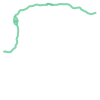

In [18]:
lines = []
river_name = 'Río Paraná'
for line in gdf.loc[gdf['name']==river_name,'geometry'].values:
    lines.append(line)
Line = linemerge(lines)
Line

## Rio Parana, 105 Landsat images (download + analysis)

### Download images and extract graphs
This takes ~3 hours for ~100 images (which is ~3 scenes/year for Landsat data), not including downloading the data.


In [19]:
path_number = 226 # Rio Parana
row_number = 79
max_cloud_cover = 10
n_scenes_per_year = 3
download_images = False
river_name = 'Río Paraguay'
automate_start_end_point_detection = False

if download_images:
    for year in range(1984, 2013):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LT05/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B2', 'SR_B5'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')
    
    for year in range(2013, 2022):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')
    
    for year in range(2021, 2023):
        start_date = str(year)+'-01-01'
        end_date =  str(year)+'-12-31'
        collection = ee.ImageCollection("LANDSAT/LC09/C02/T1_L2") \
          .filterDate(start_date, end_date) \
          .filter(ee.Filter.eq('WRS_PATH', path_number)) \
          .filter(ee.Filter.eq('WRS_ROW', row_number)) \
          .filter(ee.Filter.lt("CLOUD_COVER", max_cloud_cover)) \
          .sort('CLOUD_COVER',True).limit(n_scenes_per_year)
        imgs = collection.toList(collection.size())
        for i in range(collection.size().getInfo()):
            im = ee.Image(imgs.get(i))
            tilename = im.getString('system:index').getInfo()
            mndwi = im.normalizedDifference(['SR_B3', 'SR_B6'])
            geemap.download_ee_image(mndwi, '/Users/zoltan/Dropbox/rivabar_data/'+tilename+'_mndwi.tif')

dirname = '/Users/zoltan/Dropbox/rivabar_data/'
fnames = []

for name in glob.glob('/Users/zoltan/Dropbox/rivabar_data/*' + f"{path_number:03d}" + f"{row_number:03d}" + '*.tif'):
    fnames.append(name.split('/')[-1])
fnames = sorted(fnames, key=lambda s: s[12:20])

im, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y = rb.read_and_plot_im(dirname, fnames[0])

if automate_start_end_point_detection:
    wrs2_gdf = geopandas.read_file('/Users/zoltan/Dropbox/rivabar/WRS2_descending_0/WRS2_descending.shp') 
    polygon = wrs2_gdf[(wrs2_gdf['PATH']==path_number) & (wrs2_gdf['ROW']==row_number)]['geometry'].values[0]
    gdf = ox.features_from_polygon(polygon, tags={'waterway': ['river', 'stream', 'tidal channel']})
    lines = []
    for line in gdf.loc[gdf['name']==river_name,'geometry'].values:
        lines.append(line)
    Line = linemerge(lines)
    geoms = Line.intersection(polygon.exterior).geoms
    points = []
    for geom in geoms:
        points.append((geom.xy[0][0], geom.xy[1][0]))
    
    # Convert the list of points into a numpy array
    data = np.array(points)
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(data)
    # Get the coordinates of the cluster centers
    centroids = kmeans.cluster_centers_
    
    dem = ee.Image('USGS/SRTMGL1_003')
    poi1 = ee.Geometry.Point(list(centroids[0]))
    poi2 = ee.Geometry.Point(list(centroids[1]))
    scale = 10000 # scale in meters
    dem_poi1 = dem.sample(poi1, scale).first().get('elevation').getInfo()
    dem_poi2 = dem.sample(poi2, scale).first().get('elevation').getInfo()
    print(dem_poi1, dem_poi2)
    if dem_poi1 > dem_poi2:
        start_point = 0
        end_point = 1
    else:
        start_point = 1
        end_point = 0
    
    points_gs = geopandas.GeoSeries([Point(centroids[0]), Point(centroids[1])])
else:
    point0 = [-57.35586404800416, -27.36468802461247] # longitude, latitude
    point1 = [-59.09495472908021, -28.220433108132823]
    start_point = 0
    end_point = 1
    
points_gs = geopandas.GeoSeries([Point(point0), Point(point1)])
points_gdf = geopandas.GeoDataFrame(geometry=points_gs)
points_gdf.crs = 'epsg:'+str(wrs2_gdf.crs.to_epsg())
points_gdf = points_gdf.to_crs(dataset.crs.data['init'])

start_x = points_gdf.loc[start_point, 'geometry'].xy[0][0]
start_y = points_gdf.loc[start_point, 'geometry'].xy[1][0]
end_x = points_gdf.loc[end_point, 'geometry'].xy[0][0]
end_y = points_gdf.loc[end_point, 'geometry'].xy[1][0]

G_rooks = []
D_primals = []
processed_tiles = []
problem_list = []

count = 0
for fname in fnames:
    process_file = True
    if process_file:
        print(fname)
        D_primal, G_rook, G_primal, mndwi, dataset, left_utm_x, right_utm_x, lower_utm_y, upper_utm_y, xs, ys =\
                rb.extract_centerline(fname, dirname, start_x, start_y, end_x, end_y,\
                file_type='water_index', ch_belt_smooth_factor=1e8, ch_belt_half_width = 2000, 
                remove_smaller_components=True, delete_pixels_polys = False)
        if len(G_rook) > 0:
            processed_tiles.append(fname)
            D_primals.append(D_primal)
            G_rooks.append(G_rook)
        count += 1
        print(str(count) + ' out of ' + str(len(fnames)) + ' processed')

LT05_226079_19850124_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 183/183 [00:00<00:00, 5271.80it/s]


creating linestrings for primal graph


185it [00:04, 39.17it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9011/9011 [00:00<00:00, 16936.28it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 183/183 [00:19<00:00,  9.25it/s]


setting half channel widths


100%|█████████████████████████████████████████| 551/551 [00:05<00:00, 99.26it/s]


1 out of 106 processed
LT05_226079_19860127_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 187/187 [00:00<00:00, 5440.95it/s]


creating linestrings for primal graph


189it [00:04, 39.18it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8859/8859 [00:00<00:00, 18484.35it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 187/187 [00:19<00:00,  9.37it/s]


setting half channel widths


100%|████████████████████████████████████████| 552/552 [00:05<00:00, 101.59it/s]


2 out of 106 processed
LT05_226079_19860807_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 178/178 [00:00<00:00, 5420.77it/s]


creating linestrings for primal graph


180it [00:04, 40.13it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8620/8620 [00:00<00:00, 17827.19it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 178/178 [00:18<00:00,  9.60it/s]


setting half channel widths


100%|████████████████████████████████████████| 532/532 [00:04<00:00, 109.89it/s]


3 out of 106 processed
LT05_226079_19860908_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 192/192 [00:00<00:00, 5477.08it/s]


creating linestrings for primal graph


194it [00:05, 36.77it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8874/8874 [00:00<00:00, 15522.64it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 192/192 [00:21<00:00,  8.99it/s]


setting half channel widths


100%|████████████████████████████████████████| 570/570 [00:05<00:00, 106.25it/s]


4 out of 106 processed
LT05_226079_19870130_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 184/184 [00:00<00:00, 5316.05it/s]


creating linestrings for primal graph


186it [00:04, 37.85it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8637/8637 [00:00<00:00, 16539.52it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 184/184 [00:20<00:00,  8.79it/s]


setting half channel widths


100%|████████████████████████████████████████| 548/548 [00:05<00:00, 102.15it/s]


5 out of 106 processed
LT05_226079_19870215_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 165/165 [00:00<00:00, 5063.36it/s]


creating linestrings for primal graph


167it [00:03, 42.78it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8705/8705 [00:00<00:00, 14749.39it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 165/165 [00:19<00:00,  8.63it/s]


setting half channel widths


100%|████████████████████████████████████████| 492/492 [00:04<00:00, 101.91it/s]


6 out of 106 processed
LT05_226079_19870303_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 168/168 [00:00<00:00, 5242.33it/s]


creating linestrings for primal graph


170it [00:04, 42.45it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8612/8612 [00:00<00:00, 13624.34it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 168/168 [00:19<00:00,  8.62it/s]


setting half channel widths


100%|████████████████████████████████████████| 503/503 [00:04<00:00, 101.80it/s]


7 out of 106 processed
LT05_226079_19880202_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 171/171 [00:00<00:00, 5119.31it/s]


creating linestrings for primal graph


173it [00:04, 40.70it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8839/8839 [00:00<00:00, 14463.68it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 171/171 [00:20<00:00,  8.49it/s]


setting half channel widths


100%|████████████████████████████████████████| 514/514 [00:05<00:00, 101.12it/s]


8 out of 106 processed
LT05_226079_19880218_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5137.11it/s]


creating linestrings for primal graph


174it [00:04, 41.00it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8601/8601 [00:00<00:00, 16775.01it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:20<00:00,  8.47it/s]


setting half channel widths


100%|████████████████████████████████████████| 516/516 [00:05<00:00, 102.57it/s]


9 out of 106 processed
LT05_226079_19880305_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 5200.34it/s]


creating linestrings for primal graph


171it [00:04, 42.45it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8770/8770 [00:00<00:00, 16011.60it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:19<00:00,  8.69it/s]


setting half channel widths


100%|████████████████████████████████████████| 503/503 [00:04<00:00, 101.50it/s]


10 out of 106 processed
LT05_226079_19890204_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 335/335 [00:00<00:00, 6200.05it/s]


creating linestrings for primal graph


337it [00:16, 20.41it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████| 10280/10280 [00:00<00:00, 14775.83it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 335/335 [00:37<00:00,  8.98it/s]


setting half channel widths


100%|█████████████████████████████████████████| 993/993 [00:10<00:00, 92.25it/s]


11 out of 106 processed
LT05_226079_19890324_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 187/187 [00:00<00:00, 5279.23it/s]


creating linestrings for primal graph


189it [00:04, 39.00it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9083/9083 [00:00<00:00, 16142.54it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 187/187 [00:21<00:00,  8.87it/s]


setting half channel widths


100%|████████████████████████████████████████| 556/556 [00:05<00:00, 105.37it/s]


12 out of 106 processed
LT05_226079_19890527_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 173/173 [00:00<00:00, 5304.01it/s]


creating linestrings for primal graph


175it [00:04, 40.96it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8498/8498 [00:00<00:00, 16995.84it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 173/173 [00:19<00:00,  8.88it/s]


setting half channel widths


100%|████████████████████████████████████████| 517/517 [00:04<00:00, 109.39it/s]


13 out of 106 processed
LT05_226079_19900327_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5187.76it/s]


creating linestrings for primal graph


174it [00:04, 40.97it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8691/8691 [00:00<00:00, 19228.57it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  8.65it/s]


setting half channel widths


100%|████████████████████████████████████████| 512/512 [00:04<00:00, 103.52it/s]


14 out of 106 processed
LT05_226079_19900615_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 418/418 [00:00<00:00, 6884.98it/s]


creating linestrings for primal graph


420it [00:24, 16.99it/s]


getting bank coordinates for the two main banks


100%|██████████████████████████████████| 10574/10574 [00:00<00:00, 13547.15it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 418/418 [00:41<00:00, 10.01it/s]


setting half channel widths


100%|███████████████████████████████████████| 1243/1243 [00:14<00:00, 83.01it/s]


15 out of 106 processed
LT05_226079_19900802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 214/214 [00:00<00:00, 5785.02it/s]


creating linestrings for primal graph


216it [00:06, 32.77it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8984/8984 [00:00<00:00, 14405.93it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 214/214 [00:23<00:00,  9.19it/s]


setting half channel widths


100%|████████████████████████████████████████| 642/642 [00:06<00:00, 101.11it/s]


16 out of 106 processed
LT05_226079_19910330_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 170/170 [00:00<00:00, 4877.33it/s]


creating linestrings for primal graph


172it [00:04, 40.04it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8650/8650 [00:00<00:00, 16451.18it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 170/170 [00:19<00:00,  8.63it/s]


setting half channel widths


100%|████████████████████████████████████████| 511/511 [00:05<00:00, 102.01it/s]


17 out of 106 processed
LT05_226079_19911008_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
finding nodes that are within a certain radius of the path


100%|█████████████████████████████████████████| 80/80 [00:00<00:00, 5603.33it/s]


creating linestrings for primal graph


82it [00:00, 86.59it/s] 


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 4408/4408 [00:00<00:00, 17610.59it/s]


getting bank coordinates for the rest of the islands


100%|███████████████████████████████████████████| 80/80 [00:09<00:00,  8.69it/s]


setting half channel widths


100%|████████████████████████████████████████| 239/239 [00:01<00:00, 212.81it/s]


18 out of 106 processed
LT05_226079_19920417_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 163/163 [00:00<00:00, 5052.86it/s]


creating linestrings for primal graph


165it [00:03, 42.62it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8486/8486 [00:00<00:00, 14404.26it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 163/163 [00:18<00:00,  8.68it/s]


setting half channel widths


100%|████████████████████████████████████████| 484/484 [00:04<00:00, 103.32it/s]


19 out of 106 processed
LT05_226079_19920823_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 156/156 [00:00<00:00, 5131.85it/s]


creating linestrings for primal graph


158it [00:03, 45.66it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8565/8565 [00:00<00:00, 13852.03it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 156/156 [00:17<00:00,  8.76it/s]


setting half channel widths


100%|████████████████████████████████████████| 467/467 [00:04<00:00, 110.09it/s]


20 out of 106 processed
LT05_226079_19921213_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 5134.21it/s]


creating linestrings for primal graph


164it [00:03, 44.63it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8445/8445 [00:00<00:00, 14656.80it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:18<00:00,  8.77it/s]


setting half channel widths


100%|█████████████████████████████████████████| 476/476 [00:04<00:00, 98.44it/s]


21 out of 106 processed
LT05_226079_19930215_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 5229.68it/s]


creating linestrings for primal graph


164it [00:03, 42.65it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8699/8699 [00:00<00:00, 14852.95it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:18<00:00,  8.95it/s]


setting half channel widths


100%|████████████████████████████████████████| 485/485 [00:04<00:00, 108.50it/s]


22 out of 106 processed
LT05_226079_19930506_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 167/167 [00:00<00:00, 5273.47it/s]


creating linestrings for primal graph


169it [00:04, 41.76it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8614/8614 [00:00<00:00, 17440.71it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 167/167 [00:19<00:00,  8.50it/s]


setting half channel widths


100%|████████████████████████████████████████| 499/499 [00:04<00:00, 106.69it/s]


23 out of 106 processed
LT05_226079_19930927_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 177/177 [00:00<00:00, 5105.72it/s]


creating linestrings for primal graph


179it [00:04, 39.51it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8934/8934 [00:00<00:00, 17667.01it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 177/177 [00:19<00:00,  8.96it/s]


setting half channel widths


100%|████████████████████████████████████████| 529/529 [00:05<00:00, 104.86it/s]


24 out of 106 processed
LT05_226079_19940101_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 165/165 [00:00<00:00, 5012.31it/s]


creating linestrings for primal graph


167it [00:03, 41.84it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8756/8756 [00:00<00:00, 17466.07it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 165/165 [00:19<00:00,  8.43it/s]


setting half channel widths


100%|█████████████████████████████████████████| 496/496 [00:05<00:00, 99.08it/s]


25 out of 106 processed
LT05_226079_19940117_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 176/176 [00:00<00:00, 5056.60it/s]


creating linestrings for primal graph


178it [00:04, 39.83it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8895/8895 [00:00<00:00, 17178.21it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 176/176 [00:20<00:00,  8.65it/s]


setting half channel widths


100%|████████████████████████████████████████| 525/525 [00:05<00:00, 104.66it/s]


26 out of 106 processed
LT05_226079_19941203_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5458.56it/s]


creating linestrings for primal graph


174it [00:04, 41.19it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9009/9009 [00:00<00:00, 16418.28it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  8.76it/s]


setting half channel widths


100%|████████████████████████████████████████| 518/518 [00:05<00:00, 102.43it/s]


27 out of 106 processed
LT05_226079_19950325_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 4822.48it/s]


creating linestrings for primal graph


171it [00:04, 40.98it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9227/9227 [00:00<00:00, 14449.52it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:19<00:00,  8.49it/s]


setting half channel widths


100%|█████████████████████████████████████████| 504/504 [00:05<00:00, 96.90it/s]


28 out of 106 processed
LT05_226079_19950629_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 179/179 [00:00<00:00, 5517.32it/s]


creating linestrings for primal graph


181it [00:04, 40.22it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9016/9016 [00:00<00:00, 17556.71it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 179/179 [00:20<00:00,  8.69it/s]


setting half channel widths


100%|████████████████████████████████████████| 536/536 [00:05<00:00, 104.24it/s]


29 out of 106 processed
LT05_226079_19950917_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 185/185 [00:00<00:00, 5501.53it/s]


creating linestrings for primal graph


187it [00:04, 39.02it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8898/8898 [00:00<00:00, 18458.13it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 185/185 [00:19<00:00,  9.28it/s]


setting half channel widths


100%|████████████████████████████████████████| 553/553 [00:05<00:00, 107.59it/s]


30 out of 106 processed
LT05_226079_19960107_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 165/165 [00:00<00:00, 5402.25it/s]


creating linestrings for primal graph


167it [00:03, 44.28it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8567/8567 [00:00<00:00, 18528.44it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 165/165 [00:17<00:00,  9.19it/s]


setting half channel widths


100%|████████████████████████████████████████| 490/490 [00:04<00:00, 110.34it/s]


31 out of 106 processed
LT05_226079_19960802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 159/159 [00:00<00:00, 5222.35it/s]


creating linestrings for primal graph


161it [00:03, 44.70it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8715/8715 [00:00<00:00, 19236.84it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 159/159 [00:17<00:00,  9.09it/s]


setting half channel widths


100%|████████████████████████████████████████| 473/473 [00:04<00:00, 108.87it/s]


32 out of 106 processed
LT05_226079_19960818_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 163/163 [00:00<00:00, 5438.05it/s]


creating linestrings for primal graph


165it [00:03, 44.88it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8809/8809 [00:00<00:00, 18501.68it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 163/163 [00:18<00:00,  8.82it/s]


setting half channel widths


100%|████████████████████████████████████████| 484/484 [00:04<00:00, 108.79it/s]


33 out of 106 processed
LT05_226079_19970330_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 176/176 [00:00<00:00, 5246.05it/s]


creating linestrings for primal graph


178it [00:04, 40.32it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8992/8992 [00:00<00:00, 16147.43it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 176/176 [00:20<00:00,  8.64it/s]


setting half channel widths


100%|████████████████████████████████████████| 529/529 [00:05<00:00, 100.45it/s]


34 out of 106 processed
LT05_226079_19970805_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 161/161 [00:00<00:00, 5285.43it/s]


creating linestrings for primal graph


163it [00:03, 44.82it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8809/8809 [00:00<00:00, 15345.78it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 161/161 [00:18<00:00,  8.70it/s]


setting half channel widths


100%|████████████████████████████████████████| 479/479 [00:04<00:00, 104.92it/s]


35 out of 106 processed
LT05_226079_19970906_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 170/170 [00:00<00:00, 5235.60it/s]


creating linestrings for primal graph


172it [00:04, 41.87it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8740/8740 [00:00<00:00, 15888.62it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 170/170 [00:19<00:00,  8.65it/s]


setting half channel widths


100%|████████████████████████████████████████| 507/507 [00:04<00:00, 106.50it/s]


36 out of 106 processed
LT05_226079_19980301_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 168/168 [00:00<00:00, 5193.19it/s]


creating linestrings for primal graph


170it [00:04, 41.75it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8707/8707 [00:00<00:00, 14356.26it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 168/168 [00:19<00:00,  8.61it/s]


setting half channel widths


100%|████████████████████████████████████████| 501/501 [00:04<00:00, 105.78it/s]


37 out of 106 processed
LT05_226079_19980402_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 278/278 [00:00<00:00, 5821.12it/s]


creating linestrings for primal graph


280it [00:11, 24.79it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9025/9025 [00:00<00:00, 14741.05it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 278/278 [00:32<00:00,  8.67it/s]


setting half channel widths


100%|█████████████████████████████████████████| 828/828 [00:08<00:00, 98.00it/s]


38 out of 106 processed
LT05_226079_19980621_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 138/138 [00:00<00:00, 5258.93it/s]


creating linestrings for primal graph


140it [00:02, 50.30it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 7994/7994 [00:00<00:00, 14750.69it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 138/138 [00:15<00:00,  8.95it/s]


setting half channel widths


100%|████████████████████████████████████████| 414/414 [00:03<00:00, 116.91it/s]


39 out of 106 processed
LT05_226079_19990131_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 176/176 [00:00<00:00, 5159.48it/s]


creating linestrings for primal graph


178it [00:04, 39.35it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9098/9098 [00:00<00:00, 14359.88it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 176/176 [00:20<00:00,  8.39it/s]


setting half channel widths


100%|█████████████████████████████████████████| 524/524 [00:05<00:00, 97.41it/s]


40 out of 106 processed
LT05_226079_19990507_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 167/167 [00:00<00:00, 5315.97it/s]


creating linestrings for primal graph


169it [00:03, 42.50it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8789/8789 [00:00<00:00, 15487.44it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 167/167 [00:18<00:00,  9.01it/s]


setting half channel widths


100%|████████████████████████████████████████| 497/497 [00:04<00:00, 103.20it/s]


41 out of 106 processed
LT05_226079_19990811_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5333.35it/s]


creating linestrings for primal graph


174it [00:04, 41.16it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8601/8601 [00:00<00:00, 15951.00it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  8.73it/s]


setting half channel widths


100%|████████████████████████████████████████| 515/515 [00:04<00:00, 106.86it/s]


42 out of 106 processed
LT05_226079_20000102_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 153/153 [00:00<00:00, 5217.81it/s]


creating linestrings for primal graph


155it [00:03, 46.03it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8619/8619 [00:00<00:00, 18173.76it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 153/153 [00:16<00:00,  9.07it/s]


setting half channel widths


100%|████████████████████████████████████████| 457/457 [00:04<00:00, 109.18it/s]


43 out of 106 processed
LT05_226079_20000423_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 176/176 [00:00<00:00, 5264.27it/s]


creating linestrings for primal graph


178it [00:04, 40.79it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8637/8637 [00:00<00:00, 16810.12it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 176/176 [00:19<00:00,  9.08it/s]


setting half channel widths


100%|████████████████████████████████████████| 523/523 [00:04<00:00, 108.32it/s]


44 out of 106 processed
LT05_226079_20000930_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 5298.27it/s]


creating linestrings for primal graph


164it [00:03, 43.82it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8559/8559 [00:00<00:00, 14331.88it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:18<00:00,  8.97it/s]


setting half channel widths


100%|████████████████████████████████████████| 483/483 [00:04<00:00, 109.44it/s]


45 out of 106 processed
LT05_226079_20010731_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
path is too short!
finding nodes that are within a certain radius of the path


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 15553.66it/s]

main path is too short
46 out of 106 processed
LT05_226079_20011019_mndwi.tif


removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 165/165 [00:00<00:00, 5338.08it/s]


creating linestrings for primal graph


167it [00:03, 44.01it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8765/8765 [00:00<00:00, 16488.12it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 165/165 [00:18<00:00,  8.78it/s]


setting half channel widths


100%|████████████████████████████████████████| 492/492 [00:04<00:00, 106.48it/s]


47 out of 106 processed
LT05_226079_20011104_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5665.53it/s]


creating linestrings for primal graph


174it [00:04, 41.52it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8686/8686 [00:00<00:00, 17933.58it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  9.01it/s]


setting half channel widths


100%|████████████████████████████████████████| 516/516 [00:04<00:00, 108.62it/s]


48 out of 106 processed
LT05_226079_20020224_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 174/174 [00:00<00:00, 5384.18it/s]


creating linestrings for primal graph


176it [00:04, 41.77it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8843/8843 [00:00<00:00, 15326.19it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 174/174 [00:19<00:00,  8.76it/s]


setting half channel widths


100%|████████████████████████████████████████| 517/517 [00:04<00:00, 104.23it/s]


49 out of 106 processed
LT05_226079_20030806_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 173/173 [00:00<00:00, 5294.56it/s]


creating linestrings for primal graph


175it [00:04, 41.19it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8714/8714 [00:00<00:00, 17129.61it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 173/173 [00:20<00:00,  8.40it/s]


setting half channel widths


100%|████████████████████████████████████████| 514/514 [00:04<00:00, 106.43it/s]


50 out of 106 processed
LT05_226079_20030923_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 5411.22it/s]


creating linestrings for primal graph


162it [00:03, 44.88it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8649/8649 [00:00<00:00, 17758.11it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 160/160 [00:17<00:00,  9.07it/s]


setting half channel widths


100%|████████████████████████████████████████| 473/473 [00:04<00:00, 105.99it/s]


51 out of 106 processed
LT05_226079_20040129_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 5100.41it/s]


creating linestrings for primal graph


164it [00:03, 43.66it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8843/8843 [00:00<00:00, 16035.71it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:18<00:00,  8.88it/s]


setting half channel widths


100%|████████████████████████████████████████| 484/484 [00:04<00:00, 106.85it/s]


52 out of 106 processed
LT05_226079_20040317_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 165/165 [00:00<00:00, 5551.98it/s]


creating linestrings for primal graph


167it [00:03, 43.09it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8780/8780 [00:00<00:00, 16322.40it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 165/165 [00:19<00:00,  8.49it/s]


setting half channel widths


100%|████████████████████████████████████████| 488/488 [00:04<00:00, 104.55it/s]


53 out of 106 processed
LT05_226079_20040808_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 167/167 [00:00<00:00, 5288.16it/s]


creating linestrings for primal graph


169it [00:04, 41.55it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8754/8754 [00:00<00:00, 15652.90it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 167/167 [00:19<00:00,  8.38it/s]


setting half channel widths


100%|████████████████████████████████████████| 498/498 [00:04<00:00, 105.10it/s]


54 out of 106 processed
LT05_226079_20050216_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 164/164 [00:00<00:00, 5263.02it/s]


creating linestrings for primal graph


166it [00:04, 40.89it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8635/8635 [00:00<00:00, 13862.91it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 164/164 [00:19<00:00,  8.41it/s]


setting half channel widths


100%|████████████████████████████████████████| 491/491 [00:04<00:00, 104.37it/s]


55 out of 106 processed
LT05_226079_20050304_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 171/171 [00:00<00:00, 5136.95it/s]


creating linestrings for primal graph


173it [00:04, 41.46it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8810/8810 [00:00<00:00, 16674.74it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 171/171 [00:19<00:00,  8.99it/s]


setting half channel widths


100%|████████████████████████████████████████| 508/508 [00:04<00:00, 104.73it/s]


56 out of 106 processed
LT05_226079_20050320_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 181/181 [00:00<00:00, 5506.21it/s]


creating linestrings for primal graph


183it [00:04, 39.40it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8705/8705 [00:00<00:00, 16496.46it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 181/181 [00:20<00:00,  9.02it/s]


setting half channel widths


100%|████████████████████████████████████████| 539/539 [00:05<00:00, 104.96it/s]


57 out of 106 processed
LT05_226079_20060219_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 188/188 [00:00<00:00, 5444.18it/s]


creating linestrings for primal graph


190it [00:05, 37.47it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8990/8990 [00:00<00:00, 15142.55it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 188/188 [00:21<00:00,  8.71it/s]


setting half channel widths


100%|████████████████████████████████████████| 562/562 [00:05<00:00, 105.13it/s]


58 out of 106 processed
LT05_226079_20060307_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 155/155 [00:00<00:00, 5294.46it/s]


creating linestrings for primal graph


157it [00:03, 46.10it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8789/8789 [00:00<00:00, 14984.94it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 155/155 [00:17<00:00,  8.70it/s]


setting half channel widths


100%|████████████████████████████████████████| 460/460 [00:04<00:00, 106.62it/s]


59 out of 106 processed
LT05_226079_20060424_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 159/159 [00:00<00:00, 5262.49it/s]


creating linestrings for primal graph


161it [00:03, 45.78it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8830/8830 [00:00<00:00, 15212.10it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 159/159 [00:17<00:00,  8.95it/s]


setting half channel widths


100%|████████████████████████████████████████| 469/469 [00:04<00:00, 106.19it/s]


60 out of 106 processed
LT05_226079_20070801_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 186/186 [00:00<00:00, 5304.48it/s]


creating linestrings for primal graph


188it [00:04, 38.34it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9059/9059 [00:00<00:00, 15957.68it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 186/186 [00:20<00:00,  9.04it/s]


setting half channel widths


100%|████████████████████████████████████████| 551/551 [00:05<00:00, 103.87it/s]


61 out of 106 processed
LT05_226079_20070902_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 185/185 [00:00<00:00, 5337.99it/s]


creating linestrings for primal graph


187it [00:04, 37.86it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9036/9036 [00:00<00:00, 16979.22it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 185/185 [00:21<00:00,  8.58it/s]


setting half channel widths


100%|████████████████████████████████████████| 557/557 [00:05<00:00, 104.05it/s]


62 out of 106 processed
LT05_226079_20071004_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
distance too large between nodes1 and nodes2
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 4029.88it/s]


creating linestrings for primal graph


7it [00:00, 272.60it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 2456/2456 [00:00<00:00, 42876.33it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  9.80it/s]


setting half channel widths


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 332.78it/s]


63 out of 106 processed
LT05_226079_20081006_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 188/188 [00:00<00:00, 5435.21it/s]


creating linestrings for primal graph


190it [00:04, 38.53it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9073/9073 [00:00<00:00, 16791.97it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 188/188 [00:21<00:00,  8.73it/s]


setting half channel widths


100%|████████████████████████████████████████| 560/560 [00:05<00:00, 105.28it/s]


64 out of 106 processed
LT05_226079_20081123_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5518.95it/s]


creating linestrings for primal graph


174it [00:04, 42.50it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8997/8997 [00:00<00:00, 16060.34it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  8.62it/s]


setting half channel widths


100%|████████████████████████████████████████| 509/509 [00:04<00:00, 107.14it/s]


65 out of 106 processed
LT05_226079_20090315_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 5414.61it/s]


creating linestrings for primal graph


171it [00:04, 42.56it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8743/8743 [00:00<00:00, 16179.09it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:19<00:00,  8.60it/s]


setting half channel widths


100%|████████████████████████████████████████| 501/501 [00:04<00:00, 103.67it/s]


66 out of 106 processed
LT05_226079_20090416_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 190/190 [00:00<00:00, 5430.44it/s]


creating linestrings for primal graph


192it [00:05, 37.74it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8980/8980 [00:00<00:00, 16131.87it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 190/190 [00:22<00:00,  8.59it/s]


setting half channel widths


100%|████████████████████████████████████████| 566/566 [00:05<00:00, 102.64it/s]


67 out of 106 processed
LT05_226079_20090822_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 5354.74it/s]


creating linestrings for primal graph


162it [00:03, 44.05it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8735/8735 [00:00<00:00, 13728.31it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 160/160 [00:18<00:00,  8.69it/s]


setting half channel widths


100%|████████████████████████████████████████| 478/478 [00:04<00:00, 106.69it/s]


68 out of 106 processed
LT05_226079_20100129_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 371/371 [00:00<00:00, 6395.36it/s]


creating linestrings for primal graph


373it [00:20, 18.31it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9674/9674 [00:00<00:00, 13140.38it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 371/371 [00:42<00:00,  8.78it/s]


setting half channel widths


100%|███████████████████████████████████████| 1098/1098 [00:12<00:00, 89.98it/s]


69 out of 106 processed
LT05_226079_20101028_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 171/171 [00:00<00:00, 5591.14it/s]


creating linestrings for primal graph


173it [00:03, 43.27it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8959/8959 [00:00<00:00, 16884.05it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 171/171 [00:19<00:00,  8.86it/s]


setting half channel widths


100%|████████████████████████████████████████| 506/506 [00:04<00:00, 105.33it/s]


70 out of 106 processed
LT05_226079_20101113_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 161/161 [00:00<00:00, 5403.43it/s]


creating linestrings for primal graph


163it [00:03, 45.91it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8812/8812 [00:00<00:00, 16235.30it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 161/161 [00:18<00:00,  8.54it/s]


setting half channel widths


100%|████████████████████████████████████████| 477/477 [00:04<00:00, 106.01it/s]


71 out of 106 processed
LT05_226079_20110116_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 175/175 [00:00<00:00, 5469.11it/s]


creating linestrings for primal graph


177it [00:04, 41.62it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9031/9031 [00:00<00:00, 16092.50it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 175/175 [00:19<00:00,  8.87it/s]


setting half channel widths


100%|████████████████████████████████████████| 520/520 [00:04<00:00, 104.59it/s]


72 out of 106 processed
LT05_226079_20110406_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 197/197 [00:00<00:00, 5416.87it/s]


creating linestrings for primal graph


199it [00:05, 36.91it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9020/9020 [00:00<00:00, 13517.55it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 197/197 [00:22<00:00,  8.78it/s]


setting half channel widths


100%|█████████████████████████████████████████| 585/585 [00:05<00:00, 98.58it/s]


73 out of 106 processed
LT05_226079_20110812_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 204/204 [00:00<00:00, 5597.97it/s]


creating linestrings for primal graph


206it [00:05, 34.91it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9068/9068 [00:00<00:00, 12464.47it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 204/204 [00:23<00:00,  8.73it/s]


setting half channel widths


100%|████████████████████████████████████████| 614/614 [00:06<00:00, 102.31it/s]


74 out of 106 processed
LC08_226079_20130817_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 5261.83it/s]


creating linestrings for primal graph


171it [00:04, 41.46it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8741/8741 [00:00<00:00, 15402.37it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:21<00:00,  8.00it/s]


setting half channel widths


100%|████████████████████████████████████████| 501/501 [00:04<00:00, 105.52it/s]


75 out of 106 processed
LC08_226079_20131105_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 167/167 [00:00<00:00, 5131.49it/s]


creating linestrings for primal graph


169it [00:03, 42.57it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8867/8867 [00:00<00:00, 15628.72it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 167/167 [00:20<00:00,  8.14it/s]


setting half channel widths


100%|████████████████████████████████████████| 498/498 [00:04<00:00, 103.08it/s]


76 out of 106 processed
LC08_226079_20131223_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 160/160 [00:00<00:00, 5152.51it/s]


creating linestrings for primal graph


162it [00:03, 44.27it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8812/8812 [00:00<00:00, 15886.55it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 160/160 [00:19<00:00,  8.19it/s]


setting half channel widths


100%|████████████████████████████████████████| 473/473 [00:04<00:00, 102.03it/s]


77 out of 106 processed
LC08_226079_20140313_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 167/167 [00:00<00:00, 5197.94it/s]


creating linestrings for primal graph


169it [00:04, 41.45it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9130/9130 [00:00<00:00, 16715.28it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 167/167 [00:20<00:00,  8.06it/s]


setting half channel widths


100%|████████████████████████████████████████| 497/497 [00:04<00:00, 100.81it/s]


78 out of 106 processed
LC08_226079_20140820_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 5215.72it/s]


creating linestrings for primal graph


171it [00:04, 41.46it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8805/8805 [00:00<00:00, 15319.03it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:21<00:00,  8.03it/s]


setting half channel widths


100%|████████████████████████████████████████| 504/504 [00:04<00:00, 107.05it/s]


79 out of 106 processed
LC08_226079_20140921_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5066.87it/s]


creating linestrings for primal graph


174it [00:04, 40.77it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9065/9065 [00:00<00:00, 16037.55it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:20<00:00,  8.50it/s]


setting half channel widths


100%|████████████████████████████████████████| 517/517 [00:05<00:00, 101.90it/s]


80 out of 106 processed
LC08_226079_20150316_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 169/169 [00:00<00:00, 5187.10it/s]


creating linestrings for primal graph


171it [00:04, 42.62it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9103/9103 [00:00<00:00, 15488.85it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 169/169 [00:20<00:00,  8.08it/s]


setting half channel widths


100%|████████████████████████████████████████| 499/499 [00:04<00:00, 101.52it/s]


81 out of 106 processed
LC08_226079_20150401_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 179/179 [00:00<00:00, 5107.14it/s]


creating linestrings for primal graph


181it [00:04, 38.97it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9099/9099 [00:00<00:00, 15543.30it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 179/179 [00:22<00:00,  8.13it/s]


setting half channel widths


100%|████████████████████████████████████████| 531/531 [00:05<00:00, 103.82it/s]


82 out of 106 processed
LC08_226079_20150519_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 168/168 [00:00<00:00, 5296.67it/s]


creating linestrings for primal graph


170it [00:04, 42.47it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8771/8771 [00:00<00:00, 16408.47it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 168/168 [00:20<00:00,  8.12it/s]


setting half channel widths


100%|████████████████████████████████████████| 499/499 [00:04<00:00, 105.69it/s]


83 out of 106 processed
LC08_226079_20160809_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 175/175 [00:00<00:00, 5166.20it/s]


creating linestrings for primal graph


177it [00:04, 39.60it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8924/8924 [00:00<00:00, 16542.89it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 175/175 [00:20<00:00,  8.69it/s]


setting half channel widths


100%|████████████████████████████████████████| 519/519 [00:05<00:00, 102.85it/s]


84 out of 106 processed
LC08_226079_20160825_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
no path between start_ind and end_ind
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 5047.67it/s]


creating linestrings for primal graph


164it [00:03, 42.91it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9509/9509 [00:00<00:00, 15183.74it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:20<00:00,  7.99it/s]


setting half channel widths


100%|█████████████████████████████████████████| 476/476 [00:04<00:00, 99.67it/s]


85 out of 106 processed
LC08_226079_20160910_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 175/175 [00:00<00:00, 5233.09it/s]


creating linestrings for primal graph


177it [00:04, 39.28it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9348/9348 [00:00<00:00, 15634.04it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 175/175 [00:22<00:00,  7.89it/s]


setting half channel widths


100%|████████████████████████████████████████| 518/518 [00:05<00:00, 101.94it/s]


86 out of 106 processed
LC08_226079_20170422_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 174/174 [00:00<00:00, 5179.22it/s]


creating linestrings for primal graph


176it [00:04, 38.67it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9144/9144 [00:00<00:00, 15031.56it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 174/174 [00:21<00:00,  8.07it/s]


setting half channel widths


100%|████████████████████████████████████████| 518/518 [00:05<00:00, 103.42it/s]


87 out of 106 processed
LC08_226079_20170727_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 189/189 [00:00<00:00, 5314.19it/s]


creating linestrings for primal graph


191it [00:05, 37.65it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8939/8939 [00:00<00:00, 16496.09it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 189/189 [00:21<00:00,  8.64it/s]


setting half channel widths


100%|████████████████████████████████████████| 562/562 [00:05<00:00, 106.40it/s]


88 out of 106 processed
LC08_226079_20171031_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 162/162 [00:00<00:00, 4857.75it/s]


creating linestrings for primal graph


164it [00:03, 44.11it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8832/8832 [00:00<00:00, 14811.84it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 162/162 [00:19<00:00,  8.18it/s]


setting half channel widths


100%|████████████████████████████████████████| 478/478 [00:04<00:00, 107.08it/s]


89 out of 106 processed
LC08_226079_20180103_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5246.85it/s]


creating linestrings for primal graph


174it [00:04, 40.18it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9434/9434 [00:00<00:00, 15309.77it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:20<00:00,  8.53it/s]


setting half channel widths


100%|████████████████████████████████████████| 515/515 [00:04<00:00, 103.84it/s]


90 out of 106 processed
LC08_226079_20180204_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 166/166 [00:00<00:00, 5131.55it/s]


creating linestrings for primal graph


168it [00:04, 41.15it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9047/9047 [00:00<00:00, 13429.61it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 166/166 [00:19<00:00,  8.44it/s]


setting half channel widths


100%|████████████████████████████████████████| 496/496 [00:04<00:00, 103.41it/s]


91 out of 106 processed
LC08_226079_20180714_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 180/180 [00:00<00:00, 5223.73it/s]


creating linestrings for primal graph


182it [00:04, 39.94it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8906/8906 [00:00<00:00, 17696.45it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 180/180 [00:20<00:00,  8.61it/s]


setting half channel widths


100%|████████████████████████████████████████| 533/533 [00:05<00:00, 103.88it/s]


92 out of 106 processed
LC08_226079_20190514_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 155/155 [00:00<00:00, 4995.94it/s]


creating linestrings for primal graph


157it [00:03, 44.90it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8803/8803 [00:00<00:00, 13431.31it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 155/155 [00:19<00:00,  7.92it/s]


setting half channel widths


100%|████████████████████████████████████████| 459/459 [00:04<00:00, 106.89it/s]


93 out of 106 processed
LC08_226079_20190717_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 180/180 [00:00<00:00, 5301.01it/s]


creating linestrings for primal graph


182it [00:04, 38.55it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8984/8984 [00:00<00:00, 16873.96it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 180/180 [00:22<00:00,  8.15it/s]


setting half channel widths


100%|████████████████████████████████████████| 538/538 [00:05<00:00, 102.76it/s]


94 out of 106 processed
LC08_226079_20190802_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 180/180 [00:00<00:00, 5307.83it/s]


creating linestrings for primal graph


182it [00:04, 39.21it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8901/8901 [00:00<00:00, 16404.63it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 180/180 [00:22<00:00,  8.10it/s]


setting half channel widths


100%|████████████████████████████████████████| 536/536 [00:05<00:00, 104.84it/s]


95 out of 106 processed
LC08_226079_20200226_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 187/187 [00:00<00:00, 5410.40it/s]


creating linestrings for primal graph


189it [00:04, 38.53it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9008/9008 [00:00<00:00, 17182.74it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 187/187 [00:21<00:00,  8.51it/s]


setting half channel widths


100%|████████████████████████████████████████| 556/556 [00:05<00:00, 102.73it/s]


96 out of 106 processed
LC08_226079_20200414_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 168/168 [00:00<00:00, 5476.78it/s]


creating linestrings for primal graph


170it [00:04, 41.17it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8827/8827 [00:00<00:00, 18692.63it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 168/168 [00:19<00:00,  8.49it/s]


setting half channel widths


100%|████████████████████████████████████████| 502/502 [00:04<00:00, 106.17it/s]


97 out of 106 processed
LC08_226079_20200719_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 180/180 [00:00<00:00, 5474.80it/s]


creating linestrings for primal graph


182it [00:04, 39.32it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8833/8833 [00:00<00:00, 18789.22it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 180/180 [00:20<00:00,  8.86it/s]


setting half channel widths


100%|████████████████████████████████████████| 538/538 [00:05<00:00, 103.81it/s]


98 out of 106 processed
LC08_226079_20210228_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 174/174 [00:00<00:00, 5147.62it/s]


creating linestrings for primal graph


176it [00:04, 40.43it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9089/9089 [00:00<00:00, 15877.95it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 174/174 [00:20<00:00,  8.40it/s]


setting half channel widths


100%|████████████████████████████████████████| 521/521 [00:05<00:00, 101.88it/s]


99 out of 106 processed
LC08_226079_20210401_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 174/174 [00:00<00:00, 5286.02it/s]


creating linestrings for primal graph


176it [00:04, 41.73it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9121/9121 [00:00<00:00, 16867.00it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 174/174 [00:20<00:00,  8.34it/s]


setting half channel widths


100%|████████████████████████████████████████| 515/515 [00:04<00:00, 103.05it/s]


100 out of 106 processed
LC08_226079_20210807_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 144/144 [00:00<00:00, 5387.24it/s]


creating linestrings for primal graph


146it [00:02, 49.98it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9029/9029 [00:00<00:00, 20717.84it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 144/144 [00:16<00:00,  8.57it/s]


setting half channel widths


100%|████████████████████████████████████████| 429/429 [00:04<00:00, 103.59it/s]


101 out of 106 processed
LC09_226079_20211205_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 168/168 [00:00<00:00, 5351.38it/s]


creating linestrings for primal graph


170it [00:03, 43.28it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8891/8891 [00:00<00:00, 19299.19it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 168/168 [00:19<00:00,  8.84it/s]


setting half channel widths


100%|████████████████████████████████████████| 496/496 [00:04<00:00, 108.11it/s]


102 out of 106 processed
LC09_226079_20211221_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 172/172 [00:00<00:00, 5563.98it/s]


creating linestrings for primal graph


174it [00:04, 41.75it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8865/8865 [00:00<00:00, 20574.42it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 172/172 [00:19<00:00,  8.99it/s]


setting half channel widths


100%|████████████████████████████████████████| 512/512 [00:04<00:00, 107.39it/s]


103 out of 106 processed
LC09_226079_20220122_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 153/153 [00:00<00:00, 5434.97it/s]


creating linestrings for primal graph


155it [00:03, 46.42it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8778/8778 [00:00<00:00, 20423.16it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 153/153 [00:18<00:00,  8.37it/s]


setting half channel widths


100%|████████████████████████████████████████| 455/455 [00:04<00:00, 105.73it/s]


104 out of 106 processed
LC09_226079_20220223_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 154/154 [00:00<00:00, 5208.51it/s]


creating linestrings for primal graph


156it [00:03, 44.00it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 8818/8818 [00:00<00:00, 19994.25it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 154/154 [00:18<00:00,  8.31it/s]


setting half channel widths


100%|████████████████████████████████████████| 463/463 [00:04<00:00, 100.38it/s]


105 out of 106 processed
LC09_226079_20221106_mndwi.tif
removing small holes
running skeletonization
building graph from skeleton
finding reasonable starting and ending points on graph edges
finding nodes that are within a certain radius of the path


100%|███████████████████████████████████████| 174/174 [00:00<00:00, 5301.49it/s]


creating linestrings for primal graph


176it [00:04, 40.17it/s]


getting bank coordinates for the two main banks


100%|████████████████████████████████████| 9007/9007 [00:00<00:00, 14296.69it/s]


getting bank coordinates for the rest of the islands


100%|█████████████████████████████████████████| 174/174 [00:20<00:00,  8.40it/s]


setting half channel widths


100%|████████████████████████████████████████| 522/522 [00:05<00:00, 103.70it/s]


106 out of 106 processed


### Smooth bank polygons

In [20]:
for G_rook in tqdm(G_rooks):
    for node in G_rook.nodes:
        if node > 1:
            x = G_rook.nodes()[node]['bank_polygon'].exterior.xy[0]
            y = G_rook.nodes()[node]['bank_polygon'].exterior.xy[1]
            x, y = rb.smooth_line(x, y, spline_ds = 10, spline_smoothing = 1000, savgol_window = min(11, len(x)), savgol_poly_order = 3)
            G_rook.nodes()[node]['bank_polygon_smooth'] = Polygon(list(zip(x, y)))
        else:
            x = G_rook.nodes()[node]['bank_polygon'].exterior.xy[0]
            y = G_rook.nodes()[node]['bank_polygon'].exterior.xy[1]
            # need to remove the last point from x and y for the smoothing to work:
            xs, ys = rb.smooth_line(x[:-1], y[:-1], spline_ds = 10, spline_smoothing = 1000, savgol_window = min(11, len(x)), savgol_poly_order = 3)
            G_rook.nodes()[node]['bank_polygon_smooth'] = Polygon(list(zip(xs, ys)))

100%|█████████████████████████████████████████| 105/105 [32:37<00:00, 18.65s/it]


### Create geodataframe with all polygons

In [21]:
bank_polys = []
year = []
month = []
day = []
bank_type = []
for j in range(len(G_rooks)):
    if len(G_rook) > 0:
        for i in range(0, len(G_rooks[j])):
            bank_polys.append(G_rooks[j].nodes()[i]['bank_polygon_smooth'])
            year.append(int(processed_tiles[j][12:20][:4]))
            month.append(int(processed_tiles[j][12:20][4:6]))
            day.append(int(int(processed_tiles[j][12:20][6:])))             
            if i == 0:
                bank_type.append(0)
            elif i == 1:
                bank_type.append(1)
            else:
                bank_type.append(2)
gdf = geopandas.GeoDataFrame(bank_polys, columns = ['geometry'])
gdf['year'] = year
gdf['month'] = month
gdf['day'] = day
gdf['date'] = pd.to_datetime(gdf[['year', 'month', 'day']])
gdf['timedelta'] = gdf['date'] - gdf['date'].min()
gdf['n_days'] = gdf['timedelta'].dt.days
gdf['length'] = gdf.length
gdf['type'] = bank_type
# gdf.drop(['date', 'timedelta'], axis=1, inplace=True)
gdf.crs = 'epsg:'+str(dataset.crs.to_epsg())
gdf = gdf.sort_values(by='date')
gdf = gdf.reset_index(drop=True)
for i in range(0, len(gdf.geometry)):
    if not gdf.geometry[i].is_valid:
        gdf.geometry[i] = gdf.geometry[i].buffer(0)
gdf.head()

,geometry,year,month,day,date,timedelta,n_days,length,type
0,"POLYGON ((247044.668 -3136183.987, 247044.692 ...",1985,1,24,1985-01-24,0 days,0,1.006865e+06,0
1,"POLYGON ((317162.471 -3037546.425, 317152.496 ...",1985,1,24,1985-01-24,0 days,0,1.958982e+04,2
2,"POLYGON ((321601.809 -3035560.798, 321594.294 ...",1985,1,24,1985-01-24,0 days,0,1.032377e+04,2
3,"POLYGON ((324474.128 -3034337.145, 324472.456 ...",1985,1,24,1985-01-24,0 days,0,4.936608e+03,2
4,"POLYGON ((320724.371 -3034849.694, 320712.179 ...",1985,1,24,1985-01-24,0 days,0,3.093883e+03,2


### Convert geodataframe to southern UTM zone

In [22]:
gdf = gdf.to_crs('epsg:32721') # convert geodataframe to southern UTM zone

# need to convert the original UTM bounds of the image to the new ones:
transformer = pyproj.Transformer.from_crs(CRS.from_epsg(32621), CRS.from_epsg(32721)) #, always_xy=True)
left_utm_x1, lower_utm_y1 = transformer.transform(left_utm_x, lower_utm_y)
right_utm_x1, upper_utm_y1 = transformer.transform(right_utm_x, upper_utm_y)

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.epsg(32721)) # for the southern hemisphere, we need the southern UTM zone so that cartopy doesn't get confused
ax.imshow(mndwi, extent=[left_utm_x1, right_utm_x1, lower_utm_y1, upper_utm_y1], cmap='Blues', alpha=0.8) #, transform=ccrs.epsg(32621))
ax.set_xlim(left_utm_x1, right_utm_x1)
ax.set_ylim(lower_utm_y1, upper_utm_y1)

(6848785.0, 7080415.0)

### Use 'ginput' to define area of interest for plotting

In [50]:
plt.ginput(1)

[(324910.38638620597, 6939368.01615961)]

### Plot summary of migration

In [23]:
xmin = 304895.671
xmax = 324910.386
ymin = 6939368.016
ymax = 6964461.091

aoi_poly = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
inds = [index for index, row in gdf.iterrows() if row.geometry.overlaps(aoi_poly) or row.geometry.intersects(aoi_poly)]
gdf1 = gdf.loc[inds]
gdf1 = gdf1.sort_values(by = 'date')
gdf1.reset_index(drop=True, inplace=True)

xrange = xmax-xmin
yrange = ymax-ymin

colormap = plt.get_cmap('RdBu')
unique_n_days = gdf1.n_days.unique()
count = 0
# for end_time in unique_n_days:
end_time = unique_n_days[-1]
norm = mcolors.Normalize(vmin=0, vmax=end_time)
n_tiles = len(gdf1[gdf1.n_days <= end_time].n_days.unique())
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.epsg(32721))
for i in tqdm(gdf1[gdf1.n_days <= end_time].index):
    ind = np.where(unique_n_days == gdf1['n_days'][i])[0][0]
    # if ~outliers[ind] and ch_areas[ind]/1e6 < 260 and ch_areas[ind]/1e6 > 220: # filter out droughts and large floods
    if type(gdf1.geometry[i]) == Polygon:
        ax.fill(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color=colormap(norm(gdf1['n_days'][i])), zorder=gdf1['n_days'][i], alpha=1/n_tiles)
        ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=0.05)
        if gdf1.n_days[i] != end_time:
            ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=0.05)
        else:
            ax.plot(gdf1.geometry[i].exterior.xy[0], gdf1.geometry[i].exterior.xy[1], color='k', zorder=gdf1['n_days'][i], linewidth=1.0)
            
# draw lat/lon gridlines:
transformer = pyproj.Transformer.from_crs(CRS.from_epsg(32721), CRS.from_epsg(4326), always_xy=True)
lonmin, latmin = transformer.transform(xmin, ymin)
lonmax, latmax = transformer.transform(xmax, ymax)
lons = rb.find_numbers_between(lonmin, lonmax, 1)
lats = rb.find_numbers_between(latmin, latmax, 1)
ax.gridlines(draw_labels=True, xlocs = mticker.FixedLocator(lons), ylocs = mticker.FixedLocator(lats), color='k', linewidth=0.5, zorder=gdf1.n_days.max()+1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.text(xmin+380, ymax-900, gdf1[gdf1.n_days == end_time].date.iloc[0].strftime("%Y/%m/%d"), fontsize=14, zorder=gdf1.n_days.max()+1)
scalebar = ScaleBar(1.0, "m", length_fraction=0.25, location='lower right', box_color="white", pad=0.5)
scalebar.zorder = gdf1.n_days.max()+1
# ax.arrow(xmin+xrange*1/6, ymin-200+yrange*2/3, 0, -1000, width=60, length_includes_head=True, linewidth=None, zorder=gdf1.n_days.max()+1, color='k')
# ax.text(xmin+xrange*1/6-500, ymin-200+yrange*2/3+150, 'flow', fontsize=13, zorder=gdf1.n_days.max()+1)
ax.add_artist(scalebar)

100%|███████████████████████████████████████| 2200/2200 [03:00<00:00, 12.20it/s]


### Look at relationship between channel areas and bar areas

In [24]:
reload(rb)
dates, all_bars, chs, ch_belts, bar_areas, ch_areas = rb.get_ch_and_bar_areas(gdf, xmin, xmax, ymin, ymax)

plt.figure()
plt.scatter(np.array(ch_areas)/1e6, np.array(bar_areas)/1e6, c=gdf.date.unique(), s=50, edgecolor='k')
plt.xlabel('channel area (km2)')
plt.ylabel('bar area (km2)')
plt.colorbar();

plt.figure()
plt.plot(gdf.date.unique(), np.array(bar_areas)/1e6, '.-', label='bars')
plt.plot(gdf.date.unique(), np.array(ch_areas)/1e6, '.-', label='channel')
plt.plot(gdf.date.unique(), np.array(ch_areas)/1e6 + np.array(bar_areas)/1e6, '.-');
plt.ylabel('area (km2)')
plt.legend();

100%|█████████████████████████████████████████| 105/105 [00:15<00:00,  6.95it/s]


### Save geodataframe to shapefile

In [196]:
gdf.drop(['date', 'timedelta'], axis=1, inplace=True)
gdf.to_file(dirname + 'Paraguay_226_078_bank_polygons.shp')

### Save graphs to pickle files

In [32]:
import pickle
for i in range(len(G_rooks)):
    G_rooks[i].name = processed_tiles[i][:-10]
with open("Parana_226_79_G_rooks.pickle", "wb") as f:
    pickle.dump(G_rooks, f)

In [39]:
for i in range(len(D_primals)):
    D_primals[i].name = processed_tiles[i][:-10]
with open("Parana_226_79_D_primals.pickle", "wb") as f:
    pickle.dump(D_primals, f)

### Load graphs from pickle file

In [ ]:
with open("Parana_226_79_G_rooks.pickle", "rb") as f:
    G_rooks = pickle.load(f)